# CS757, Assignment #1: Musical VAEs!

In [2]:
import librosa, os
import numpy as np
import tensorflow as tf

2025-02-28 12:38:42.607702: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 12:38:42.609019: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-28 12:38:42.612812: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-28 12:38:42.628492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740764322.655372   20152 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740764322.66

## Exploring The Music Modality

In [9]:
popdir = "../data/genres_original/pop/"
pop_songs = os.listdir(popdir)

In [10]:
audio, sr = librosa.load(popdir+pop_songs[0], sr=None)  # sr=None keeps the original sample rate

In [18]:
print(f"This song is an array of {len(audio)} floats. The first few look like: {audio[:10]}") #it's important to assert each song is the same length during training!

This song is an array of 661504 floats. The first few look like: [0.7692261  0.2246399  0.69036865 0.7468872  0.67388916 0.42617798
 0.67840576 0.39611816 0.4371338  0.61779785]


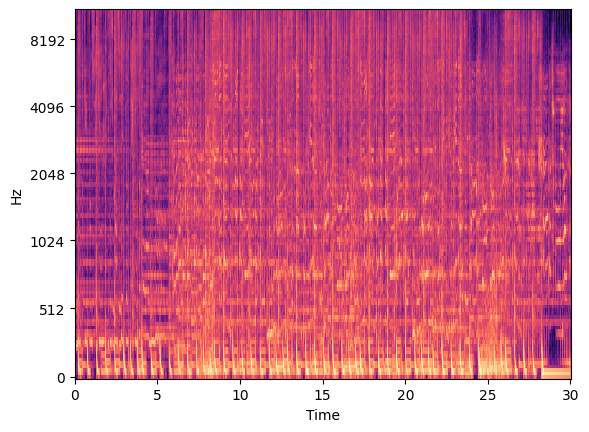

In [36]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000) #create spectrogram
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max) #logscale
librosa.display.specshow(log_mel_spectrogram, x_axis='time', y_axis='mel', sr=sr) #show

In [41]:
print(f"Unnormalized values: {log_mel_spectrogram[0][:10]}")
log_mel_spectrogram -= np.mean(log_mel_spectrogram)
log_mel_spectrogram /= np.std(log_mel_spectrogram) #normalizing the floats which compromise the song
print(f"Normalized values: {log_mel_spectrogram[0][:10]}")

print(f"Initial shape: {log_mel_spectrogram.shape}")
desired_shape = (128, 128)  # pad or truncate to the shape we expect
log_mel_spectrogram = log_mel_spectrogram[:, :128] #TODO I am not sure this is a good idea!
print(f"Post-padding shape: {log_mel_spectrogram.shape}")

Unnormalized values: [-49.389877 -39.099464 -31.797497 -26.4301   -25.543467 -29.689062
 -31.19136  -29.930378 -27.449947 -27.082748]
Normalized values: [-0.8270942   0.16125043  0.8625693   1.3780819   1.4632387   1.0650742
  0.9207857   1.041897    1.2801305   1.3153981 ]
Initial shape: (128, 1293)
Post-padding shape: (128, 128)
